In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.signal import butter, filtfilt

In [2]:
df_low = pd.read_csv(r"G:\AIT\MLOps\ProjectAnalytics\aws\filtered\high_Ph.csv")
df_low.head()

,ph_value,do_value,temp_value,salinity_value
0,9.4,9.62,27.8,136.0
1,9.5,9.61,27.8,165.9
2,6.7,9.62,27.9,169.4
3,7.2,9.62,27.9,174.5
4,13.4,9.62,27.8,136.0


In [3]:
df_high = pd.read_csv(r"G:\AIT\MLOps\ProjectAnalytics\aws\filtered\low_Ph.csv")
df_high.head()

,ph_value,do_value,temp_value,salinity_value
0,12.4,9.61,29.0,420.4
1,12.4,9.60,28.9,426.2
2,12.4,9.60,29.0,426.2
3,12.6,9.60,28.9,422.3
4,12.7,9.61,29.0,420.4


In [4]:
df_low['ph_value'] = df_low['ph_value'] - 6
df_low.head()

,ph_value,do_value,temp_value,salinity_value
0,3.4,9.62,27.8,136.0
1,3.5,9.61,27.8,165.9
2,0.7,9.62,27.9,169.4
3,1.2,9.62,27.9,174.5
4,7.4,9.62,27.8,136.0


In [5]:
df_high.shape

(486, 4)

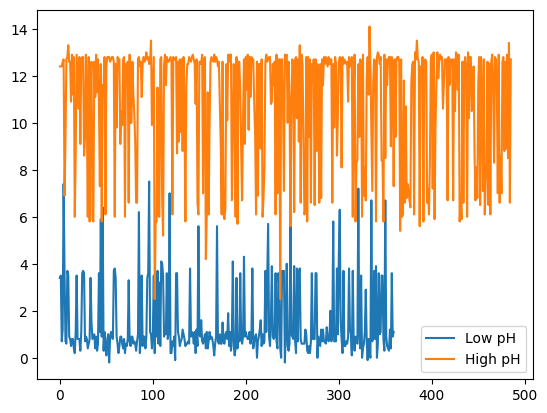

In [6]:
plt.plot(df_low.ph_value, label='Low pH')
plt.plot(df_high.ph_value, label='High pH')
plt.legend()

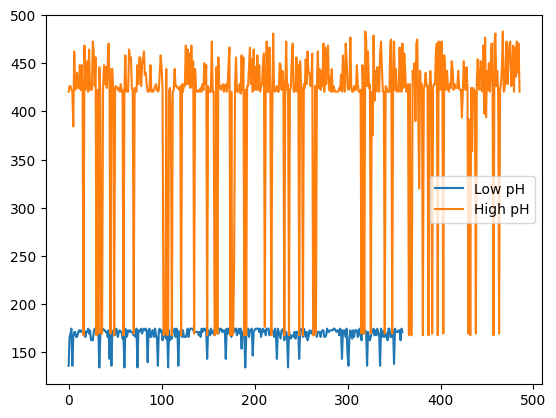

In [7]:
plt.plot(df_low.salinity_value, label='Low pH')
plt.plot(df_high.salinity_value, label='High pH')
plt.legend()

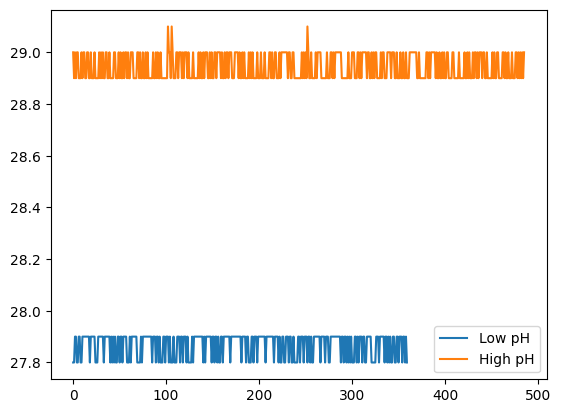

In [8]:
plt.plot(df_low.temp_value, label='Low pH')
plt.plot(df_high.temp_value, label='High pH')
plt.legend()

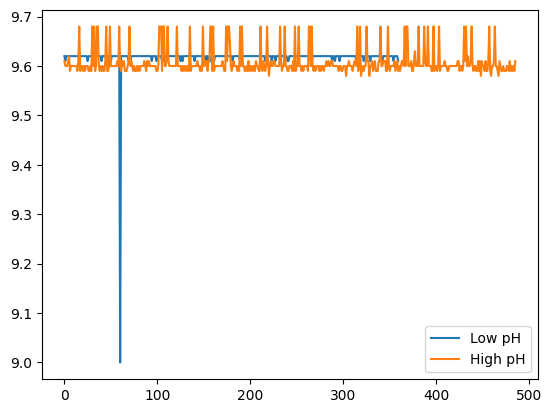

In [9]:
plt.plot(df_low.do_value, label='Low pH')
plt.plot(df_high.do_value, label='High pH')
plt.legend()

In [10]:
df_high.shape

(486, 4)

In [11]:
df_low.shape

(360, 4)

In [19]:
def apply_lowpass_filter(df: pd.DataFrame, column: str, cutoff: float = 0.1, order: int = 2, new_column: str = None) -> pd.DataFrame:
    data = df[column].values
    b, a = butter(order, cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)

    filtered_column_name = new_column if new_column else f"{column}_filtered"
    df[filtered_column_name] = filtered_data
    return df

In [20]:
df_low = apply_lowpass_filter(df_low, column='ph_value', cutoff=0.1, order=2)

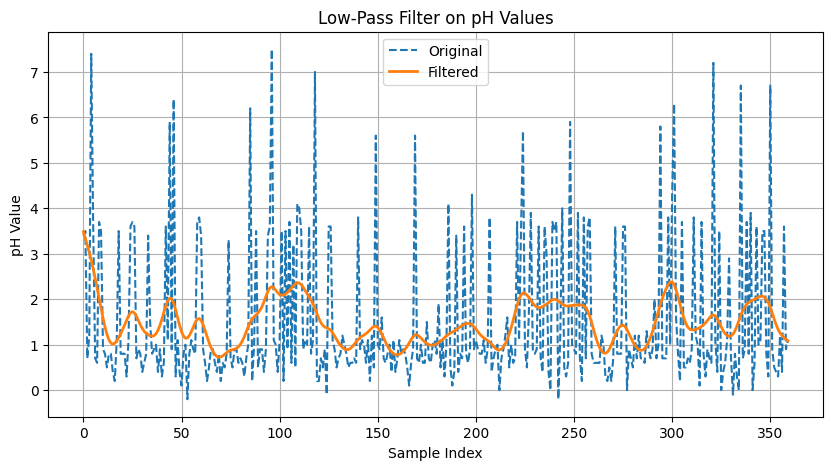

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(df_low['ph_value'], label='Original', linestyle='--')
plt.plot(df_low['ph_value_filtered'], label='Filtered', linewidth=2)

plt.title("Low-Pass Filter on pH Values")
plt.xlabel("Sample Index")
plt.ylabel("pH Value")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def drop_random_rows(df: pd.DataFrame, n: int = 100) -> pd.DataFrame:
    if n >= len(df):
        raise ValueError("Cannot drop more rows than the DataFrame has.")
    return df.drop(df.sample(n=n, random_state=42).index)

df_high_reduced = drop_random_rows(df_high, 100)